# Breadth-First Search (BFS) visualisatie en verificatie

In deze notebook reconstrueren we minstens twee grafen uit de opgegeven visualisatie, implementeren we Breadth-First Search (BFS) in Python, visualiseren we de grafen en de resulterende BFS-search-trees en valideren we de resultaten met eenvoudige assertions.


- Joshua Meuleman

- Datum 18/11/2025

- BFS - algoritme 3

In [1]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque
import json
import os
from IPython.display import display, HTML
import pytest

plt.rcParams['figure.figsize'] = (8,6)


In [2]:
def build_graph_from_adjlist(adjl, directed=False):
    G = nx.DiGraph() if directed else nx.Graph()
    # ensure all nodes present
    for u, nbrs in adjl.items():
        if not G.has_node(u):
            G.add_node(u)
        for v in nbrs:
            G.add_edge(u, v)
    return G


def load_adjlist_from_text(text, sep=':'):
    """Parse a simple adjacency list text format. Lines like "A: B, C" or "1: 2,3"."""
    adjl = {}
    for line in text.splitlines():
        line=line.strip()
        if not line or line.startswith('#'):
            continue
        if sep in line:
            left,right = line.split(sep,1)
            u = left.strip()
            nbrs = [x.strip() for x in right.split(',') if x.strip()]
            # try convert numeric
            def conv(x):
                try:
                    return int(x)
                except:
                    return x
            adjl[conv(u)] = [conv(x) for x in nbrs]
    return adjl


def draw_graph(G, pos=None, title=None, node_size=700):
    if pos is None:
        pos = nx.spring_layout(G, seed=42)
    plt.figure()
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=node_size)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos, edge_color='gray')
    if title:
        plt.title(title)
    plt.axis('off')
    return pos


def draw_graph_and_bfs_tree(G, parent, pos=None, title=None, node_size=700):
    if pos is None:
        pos = nx.spring_layout(G, seed=42)
    plt.figure()
    # draw base graph
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=node_size)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos, edge_color='lightgray')
    # build tree edges from parent dict
    tree_edges = []
    for child, p in parent.items():
        if p is not None:
            tree_edges.append((p, child))
    nx.draw_networkx_edges(G, pos, edgelist=tree_edges, edge_color='red', width=2)
    if title:
        plt.title(title)
    plt.axis('off')
    return pos


Graf1 (complex) getekend en opgeslagen als graf1_complex.png


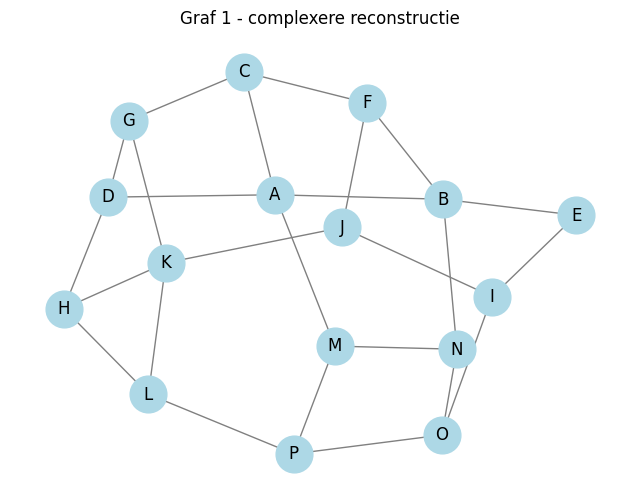

In [3]:
# Graf 1: complexere graf (meer knopen, cycles en cross-links)
adj1 = {
    'A': ['B','C','D','M'],
    'B': ['A','E','F','N'],
    'C': ['A','F','G'],
    'D': ['A','G','H'],
    'E': ['B','I'],
    'F': ['B','C','J'],
    'G': ['C','D','K'],
    'H': ['D','K','L'],
    'I': ['E','J','O'],
    'J': ['F','I','K'],
    'K': ['G','H','J','L'],
    'L': ['H','K','P'],
    'M': ['A','N','P'],
    'N': ['B','M','O'],
    'O': ['I','N','P'],
    'P': ['L','M','O']
}
G1 = build_graph_from_adjlist(adj1, directed=False)
pos1 = nx.spring_layout(G1, seed=42)
draw_graph(G1, pos1, title='Graf 1 - complexere reconstructie')
plt.savefig('graf1_complex.png', bbox_inches='tight')
print('Graf1 (complex) getekend en opgeslagen als graf1_complex.png')


Graf2 (complex) getekend en opgeslagen als graf2_complex.png


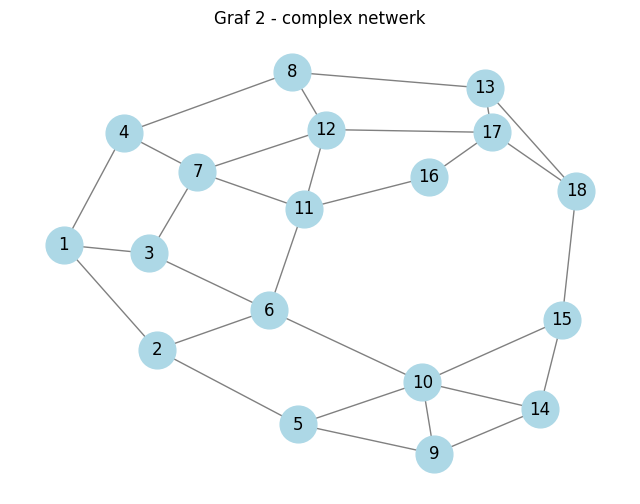

In [4]:
# Graf 2: complex netwerk met cycles, bottlenecks en cross-links
adj2 = {
    1: [2,3,4],
    2: [1,5,6],
    3: [1,6,7],
    4: [1,7,8],
    5: [2,9,10],
    6: [2,3,10,11],
    7: [3,4,11,12],
    8: [4,12,13],
    9: [5,10,14],
    10: [5,6,9,14,15],
    11: [6,7,12,16],
    12: [7,8,11,17],
    13: [8,17,18],
    14: [9,10,15],
    15: [10,14,18],
    16: [11,17],
    17: [12,13,16,18],
    18: [13,15,17]
}
G2 = build_graph_from_adjlist(adj2, directed=False)
pos2 = nx.spring_layout(G2, seed=42)
draw_graph(G2, pos2, title='Graf 2 - complex netwerk')
plt.savefig('graf2_complex.png', bbox_inches='tight')
print('Graf2 (complex) getekend en opgeslagen als graf2_complex.png')


In [5]:
def bfs(G, start):
    visited = set()
    parent = {}
    dist = {}
    order = []
    q = deque()
    q.append(start)
    visited.add(start)
    parent[start] = None
    dist[start] = 0
    while q:
        v = q.popleft()
        order.append(v)
        for nbr in G.neighbors(v):
            if nbr not in visited:
                visited.add(nbr)
                parent[nbr] = v
                dist[nbr] = dist[v] + 1
                q.append(nbr)
    return order, parent, dist

# Kleine sanity check: BFS op een triviale graf
if __name__ == '__main__':
    Gtest = nx.path_graph([0,1,2])
    order_test, parent_test, dist_test = bfs(Gtest, 0)


In [6]:
# Voer BFS uit op beide grafen en toon resultaten
order1, parent1, dist1 = bfs(G1, 'A')
print('Graf 1 - BFS order:', order1)
print('Graf 1 - Parent map:', parent1)
print('Graf 1 - Distances:', dist1)
assert len(set(order1)) == len(order1) and set(order1) == set(G1.nodes()), "Niet alle nodes van G1 werden bezocht precies eenmaal"

order2, parent2, dist2 = bfs(G2, 1)
print('\nGraf 2 - BFS order:', order2)
print('Graf 2 - Parent map:', parent2)
print('Graf 2 - Distances:', dist2)
assert len(set(order2)) == len(order2) and set(order2) == set(G2.nodes()), "Niet alle nodes van G2 werden bezocht precies eenmaal"


Graf 1 - BFS order: ['A', 'B', 'C', 'D', 'M', 'E', 'F', 'N', 'G', 'H', 'P', 'I', 'J', 'O', 'K', 'L']
Graf 1 - Parent map: {'A': None, 'B': 'A', 'C': 'A', 'D': 'A', 'M': 'A', 'E': 'B', 'F': 'B', 'N': 'B', 'G': 'C', 'H': 'D', 'P': 'M', 'I': 'E', 'J': 'F', 'O': 'N', 'K': 'G', 'L': 'H'}
Graf 1 - Distances: {'A': 0, 'B': 1, 'C': 1, 'D': 1, 'M': 1, 'E': 2, 'F': 2, 'N': 2, 'G': 2, 'H': 2, 'P': 2, 'I': 3, 'J': 3, 'O': 3, 'K': 3, 'L': 3}

Graf 2 - BFS order: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
Graf 2 - Parent map: {1: None, 2: 1, 3: 1, 4: 1, 5: 2, 6: 2, 7: 3, 8: 4, 9: 5, 10: 5, 11: 6, 12: 7, 13: 8, 14: 9, 15: 10, 16: 11, 17: 12, 18: 13}
Graf 2 - Distances: {1: 0, 2: 1, 3: 1, 4: 1, 5: 2, 6: 2, 7: 2, 8: 2, 9: 3, 10: 3, 11: 3, 12: 3, 13: 3, 14: 4, 15: 4, 16: 4, 17: 4, 18: 4}


<Figure size 800x600 with 0 Axes>

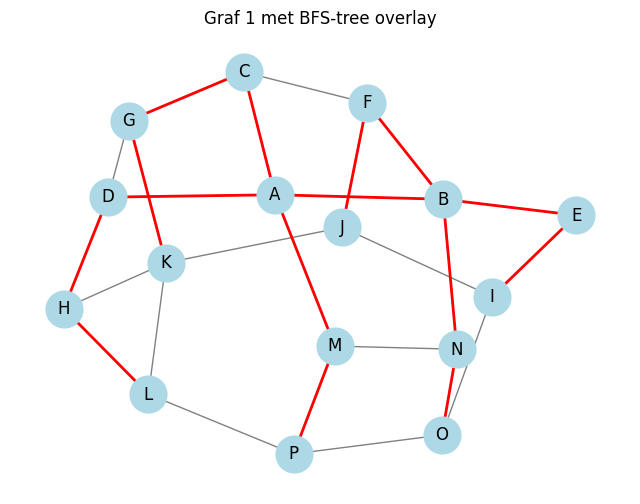

<Figure size 800x600 with 0 Axes>

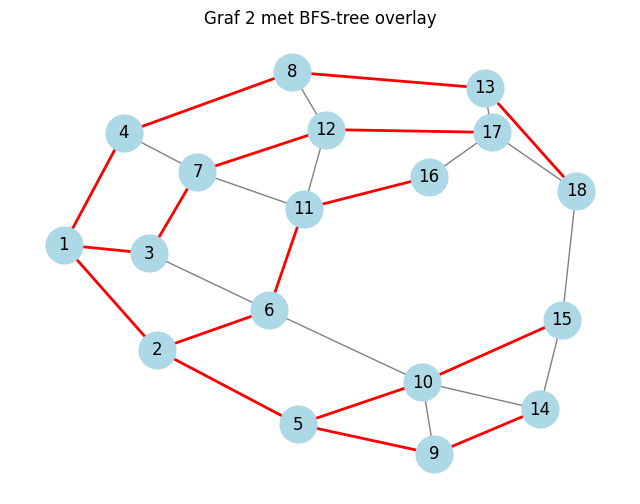

In [7]:
# Visualiseer BFS search-tree (ouderrelaties) voor elke graf

def parent_to_tree(parent):
    T = nx.DiGraph()
    for child, p in parent.items():
        if p is not None:
            T.add_edge(p, child)
    return T

T1 = parent_to_tree(parent1)
plt.figure()
# draw original graph with tree overlay
draw_graph(G1, pos1, title='Graf 1 met BFS-tree overlay')
# overlay tree edges in rood
nx.draw_networkx_edges(G1, pos1, edgelist=list(T1.edges()), edge_color='red', width=2)
plt.savefig('graf1_bfs_tree.png', bbox_inches='tight')

T2 = parent_to_tree(parent2)
plt.figure()
draw_graph(G2, pos2, title='Graf 2 met BFS-tree overlay')
nx.draw_networkx_edges(G2, pos2, edgelist=list(T2.edges()), edge_color='red', width=2)
plt.savefig('graf2_bfs_tree.png', bbox_inches='tight')


In [8]:
# Validatie: controleer dat alle nodes bezocht worden en dat afstanden consistent zijn
print('Controle: elk knooppunt wordt exact eenmaal bezocht en afstanden zijn consistent')
assert set(order1) == set(adj1.keys()), f"Niet alle knopen van Graf1 bezocht: {set(adj1.keys()) - set(order1)}"
assert set(order2) == set(adj2.keys()), f"Niet alle knopen van Graf2 bezocht: {set(adj2.keys()) - set(order2)}"

# Consistentie ouder->afstand
for child,p in parent1.items():
    if p is not None:
        assert dist1[child] == dist1[p] + 1, f"Afstand inconsistent in G1 voor {child}"
for child,p in parent2.items():
    if p is not None:
        assert dist2[child] == dist2[p] + 1, f"Afstand inconsistent in G2 voor {child}"

print('Validaties geslaagd: alle knopen bezocht en afstanden consistent.')


Controle: elk knooppunt wordt exact eenmaal bezocht en afstanden zijn consistent
Validaties geslaagd: alle knopen bezocht en afstanden consistent.


In [9]:
# Opslaan van resultaten: orders, parents en distances als JSON
results = {
    'graf1':{
        'order': order1,
        'parent': parent1,
        'dist': dist1
    },
    'graf2':{
        'order': order2,
        'parent': parent2,
        'dist': dist2
    }
}
with open('bfs_results.json','w',encoding='utf-8') as f:
    json.dump(results, f, ensure_ascii=False, indent=2)

print('Resultaten opgeslagen naar bfs_results.json en figuren naar graf1.png, graf1_bfs_tree.png, graf2.png, graf2_bfs_tree.png')


Resultaten opgeslagen naar bfs_results.json en figuren naar graf1.png, graf1_bfs_tree.png, graf2.png, graf2_bfs_tree.png
